## STEP 1 — Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## STEP 2 — Load the Dataset

In [2]:
dataset = pd.read_csv('Employee_Salary_Dataset.csv')

## STEP 3 — Convert Salary into 3 Categories

In [3]:
low_limit = dataset["Salary"].quantile(0.33)
high_limit = dataset["Salary"].quantile(0.66)

def to_category(value):
    if value <= low_limit:
        return "Low"
    elif value <= high_limit:
        return "Medium"
    else:
        return "High"

dataset["SalaryClass"] = dataset["Salary"].apply(to_category)

## STEP 4 — Prepare Features and Target

In [4]:
columns_to_remove = ["Salary", "SalaryClass"]
if "ID" in dataset.columns:
    columns_to_remove.insert(0, "ID")

X = dataset.drop(columns=columns_to_remove)
y = dataset["SalaryClass"]

## STEP 5 — Encode Categorical Columns

In [5]:
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

## STEP 6 — Train/Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, shuffle=False)

## STEP 7 — Declare All Classifiers

In [7]:
models = {
    "Bernoulli NB": BernoulliNB(),
    "Random Forest": RandomForestClassifier(random_state=5),
    "Gaussian NB": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=5),
    "Multinomial NB": MultinomialNB(),
    "KNN": KNeighborsClassifier()
}

results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []}

## STEP 8 — Train & Test All Models

In [8]:
for name, model in models.items():
    Xtr = X_train.copy()
    Xts = X_test.copy()

    if name == "Bernoulli NB":
        med = Xtr.median()
        Xtr = (Xtr > med).astype(int)
        Xts = (Xts > med).astype(int)

    model.fit(Xtr, y_train)
    predictions = model.predict(Xts)

    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average="weighted", zero_division=0)
    rec = recall_score(y_test, predictions, average="weighted", zero_division=0)
    f1 = f1_score(y_test, predictions, average="weighted", zero_division=0)

    results["Model"].append(name)
    results["Accuracy"].append(acc)
    results["Precision"].append(pre)
    results["Recall"].append(rec)
    results["F1"].append(f1)

    print(f"\n{name} Results")
    print("---------------------------")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {pre:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")


Bernoulli NB Results
---------------------------
Accuracy : 0.8182
Precision: 0.6883
Recall   : 0.8182
F1 Score : 0.7424

Random Forest Results
---------------------------
Accuracy : 0.4545
Precision: 0.6212
Recall   : 0.4545
F1 Score : 0.4870

Gaussian NB Results
---------------------------
Accuracy : 0.8182
Precision: 0.6883
Recall   : 0.8182
F1 Score : 0.7424

Decision Tree Results
---------------------------
Accuracy : 0.3636
Precision: 0.6169
Recall   : 0.3636
F1 Score : 0.4127

Multinomial NB Results
---------------------------
Accuracy : 0.4545
Precision: 0.6970
Recall   : 0.4545
F1 Score : 0.5152

KNN Results
---------------------------
Accuracy : 0.9091
Precision: 0.9242
Recall   : 0.9091
F1 Score : 0.8981


## STEP 9 — Line Graph

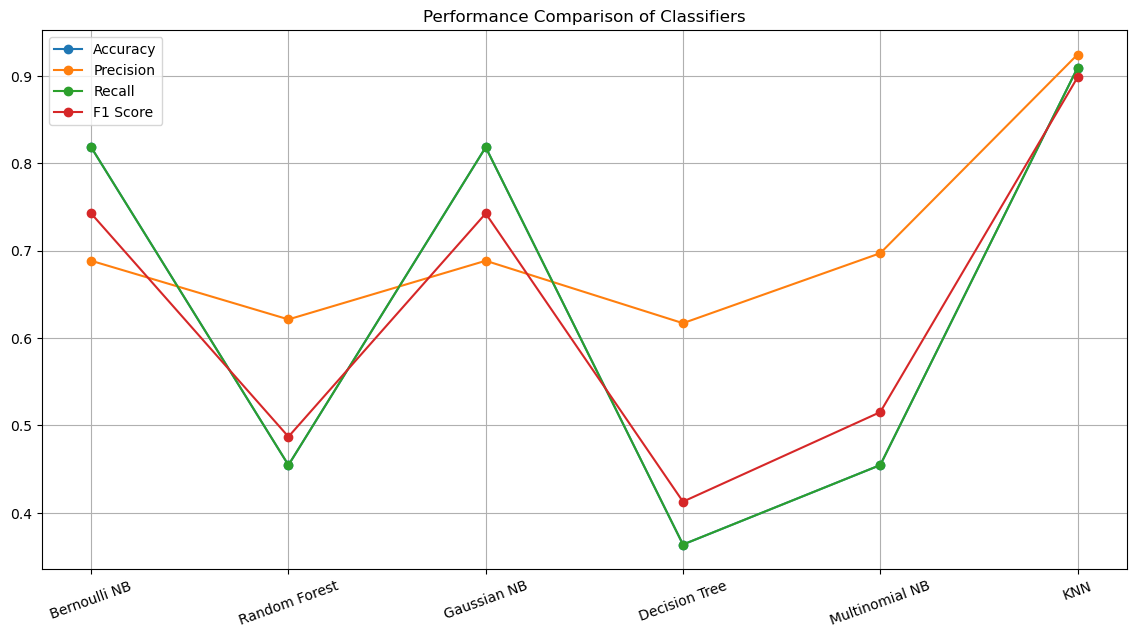

In [9]:
plt.figure(figsize=(14,7))
x_labels = results["Model"]

plt.plot(x_labels, results["Accuracy"], marker="o", label="Accuracy")
plt.plot(x_labels, results["Precision"], marker="o", label="Precision")
plt.plot(x_labels, results["Recall"], marker="o", label="Recall")
plt.plot(x_labels, results["F1"], marker="o", label="F1 Score")

plt.title("Performance Comparison of Classifiers")
plt.xticks(rotation=20)
plt.legend()
plt.grid(True)
plt.show()

## STEP 10 — Bar Graph

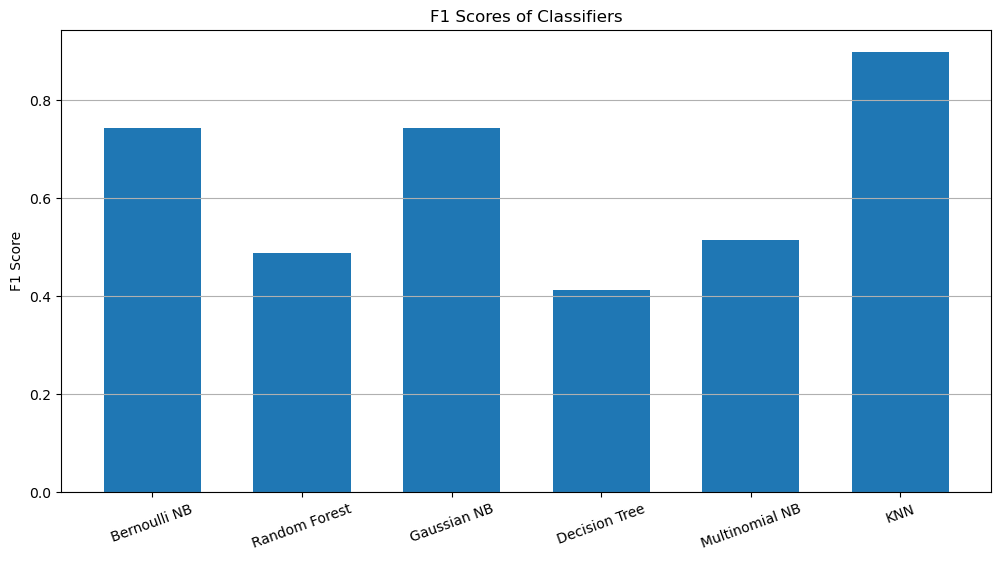

In [10]:
plt.figure(figsize=(12,6))
plt.bar(results["Model"], results["F1"], width=0.65)

plt.title("F1 Scores of Classifiers")
plt.ylabel("F1 Score")
plt.xticks(rotation=20)
plt.grid(axis="y")
plt.show()